# TRABAJO FINAL
Curso: Machine Learning

Tema: Criptomonedas

Integrantes:
  - Jos√© Antonio Mayhua Hinostroza
  - Lucero Salome Manchay Paredes
  - Ibrahim Imanol Jordi Arqui√±igo Jacinto

Grupo: 1

Fuente de la API: https://developers.coindesk.com/settings/api-keys

ADQUISICI√ìN Y PREPROCESAMIENTO DE LOS DATOS

In [2]:
import requests
import pandas as pd
import time

# Tu API Key de CryptoCompare
API_KEY = 'f06c12bd4e08d97fecda3a74fbc4ee5f6fc556e5b3d853059ee2037077b2b5c6'

headers = {
    'authorization': f'Apikey {API_KEY}'
}

# Diccionario con tokens y sus narrativas
tokens = {
    'RNDR': 'Inteligencia Artificial',
    'FET': 'Inteligencia Artificial',
    'PEPE': 'Memes',
    'SHIB': 'Memes',
    'DOGE': 'Memes',
    'ENJ': 'Videojuegos',
    'MANA': 'Videojuegos',
    'ONDO': 'RWA'
}

# Rango: desde enero 2023 hasta ahora (~910 d√≠as)
dias_totales = 910

df_total = pd.DataFrame()

for symbol, narrativa in tokens.items():
    print(f'Descargando: {symbol} ({narrativa})')
    url = 'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {
        'fsym': symbol,
        'tsym': 'USD',
        'limit': dias_totales,
        'aggregate': 1
    }

    try:
        response = requests.get(url, headers=headers, params=params)
        data = response.json()

        if data['Response'] != 'Success':
            print(f"No se pudo obtener datos para {symbol}")
            continue

        rows = []
        for d in data['Data']['Data']:
            rows.append({
                'symbol': symbol,
                'narrativa': narrativa,
                'date': pd.to_datetime(d['time'], unit='s'),
                'open': d['open'],
                'high': d['high'],
                'low': d['low'],
                'close': d['close'],
                'volume': d['volumeto']
            })

        df_token = pd.DataFrame(rows)
        df_total = pd.concat([df_total, df_token], ignore_index=True)
        print(f'{symbol} descargado ({len(df_token)} d√≠as)')
        time.sleep(1)

    except Exception as e:
        print(f"Error en {symbol}: {e}")
        continue

# Guardar todo en CSV
df_total.to_csv('cripto_historial_2023_2025.csv', index=False)
print("Archivo guardado: cripto_historial_2023_2025.csv")


Descargando: RNDR (Inteligencia Artificial)
RNDR descargado (911 d√≠as)
Descargando: FET (Inteligencia Artificial)
FET descargado (911 d√≠as)
Descargando: PEPE (Memes)
PEPE descargado (911 d√≠as)
Descargando: SHIB (Memes)
SHIB descargado (911 d√≠as)
Descargando: DOGE (Memes)
DOGE descargado (911 d√≠as)
Descargando: ENJ (Videojuegos)
ENJ descargado (911 d√≠as)
Descargando: MANA (Videojuegos)
MANA descargado (911 d√≠as)
Descargando: ONDO (RWA)
ONDO descargado (911 d√≠as)
Archivo guardado: cripto_historial_2023_2025.csv


In [3]:
import pandas as pd

# Cargar el archivo generado por CryptoCompare
df = pd.read_csv('cripto_historial_2023_2025.csv')

# Asegurarse que la columna 'date' est√© en formato datetime
df['date'] = pd.to_datetime(df['date'])

# Ordenar por s√≠mbolo y fecha
df = df.sort_values(by=['symbol', 'date']).reset_index(drop=True)

# Funci√≥n para calcular el target por token
def calcular_target(df_token):
    df_token = df_token.copy().reset_index(drop=True)  # ‚Üê importante
    df_token['target'] = 0  # Inicializa en 0

    if len(df_token) < 31:
        return df_token  # No tiene suficientes d√≠as para hacer c√°lculo

    for i in range(len(df_token) - 30):
        precio_actual = df_token.loc[i, 'close']
        precios_futuros = df_token.loc[i+1:i+30, 'close']
        precio_max_futuro = precios_futuros.max()

        if precio_max_futuro >= 1.15 * precio_actual:
            df_token.loc[i, 'target'] = 1

    return df_token

# Aplicar la funci√≥n por s√≠mbolo
df_target = df.groupby('symbol', group_keys=False).apply(calcular_target)

# Guardar el archivo final con columna target
df_target.to_csv('cripto_target_2023_2025.csv', index=False)
print("Archivo final con target guardado: cripto_target_2023_2025.csv")


Archivo final con target guardado: cripto_target_2023_2025.csv


/tmp/ipython-input-3-801025484.py:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_target = df.groupby('symbol', group_keys=False).apply(calcular_target)


# AN√ÅLISIS EDA
 1. Inspecci√≥n de datos


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tu dataset final
df = pd.read_csv('cripto_target_2023_2025.csv')

In [5]:
print("Vista previa del dataset:")
df.head()

Vista previa del dataset:


symbol narrativa        date     open     high      low    close  \
0   DOGE     Memes  2023-01-08  0.07217  0.07393  0.07124  0.07358   
1   DOGE     Memes  2023-01-09  0.07358  0.07956  0.07296  0.07562   
2   DOGE     Memes  2023-01-10  0.07562  0.07788  0.07389  0.07780   
3   DOGE     Memes  2023-01-11  0.07780  0.07855  0.07474  0.07813   
4   DOGE     Memes  2023-01-12  0.07813  0.08125  0.07542  0.08028   

        volume  target  
0  21678727.80       1  
1  78383821.44       1  
2  46975606.61       1  
3  36269939.49       1  
4  66723562.40       1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7288 entries, 0 to 7287
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     7288 non-null   object 
 1   narrativa  7288 non-null   object 
 2   date       7288 non-null   object 
 3   open       7288 non-null   float64
 4   high       7288 non-null   float64
 5   low        7288 non-null   float64
 6   close      7288 non-null   float64
 7   volume     7288 non-null   float64
 8   target     7288 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 512.6+ KB


In [7]:
print("Total de registros:", len(df))

Total de registros: 7288


In [8]:
# N√∫mero de tokens distintos
print("\nN√∫mero de criptomonedas analizadas:", df['symbol'].nunique())


N√∫mero de criptomonedas analizadas: 8


In [9]:
# Distribuci√≥n de clases en target
print("\nDistribuci√≥n del target (0: no valoriz√≥, 1: s√≠ valoriz√≥):")
print(df['target'].value_counts(normalize=True))


Distribuci√≥n del target (0: no valoriz√≥, 1: s√≠ valoriz√≥):
target
0    0.502333
1    0.497667
Name: proportion, dtype: float64


In [10]:
# Conteo por narrativa
print("\nCantidad de registros por narrativa:")
print(df['narrativa'].value_counts())


Cantidad de registros por narrativa:
narrativa
Memes                      2733
Videojuegos                1822
Inteligencia Artificial    1822
RWA                         911
Name: count, dtype: int64


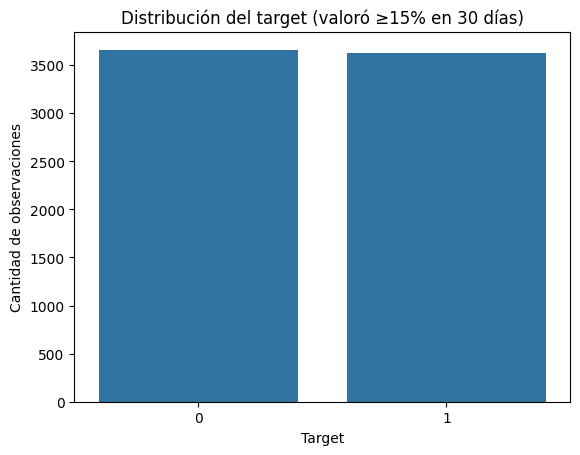

In [11]:
# Visualizaciones
# 1. Distribuci√≥n del target
sns.countplot(data=df, x='target')
plt.title("Distribuci√≥n del target (valor√≥ ‚â•15% en 30 d√≠as)")
plt.xlabel("Target")
plt.ylabel("Cantidad de observaciones")
plt.show()

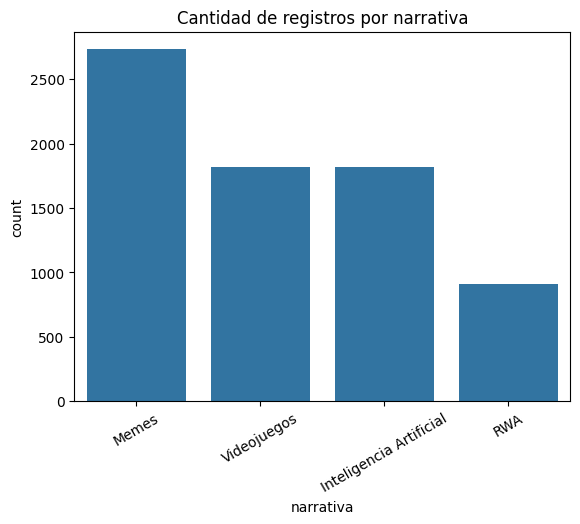

In [12]:
# 2. Distribuci√≥n por narrativa
sns.countplot(data=df, x='narrativa', order=df['narrativa'].value_counts().index)
plt.title("Cantidad de registros por narrativa")
plt.xticks(rotation=30)
plt.show()

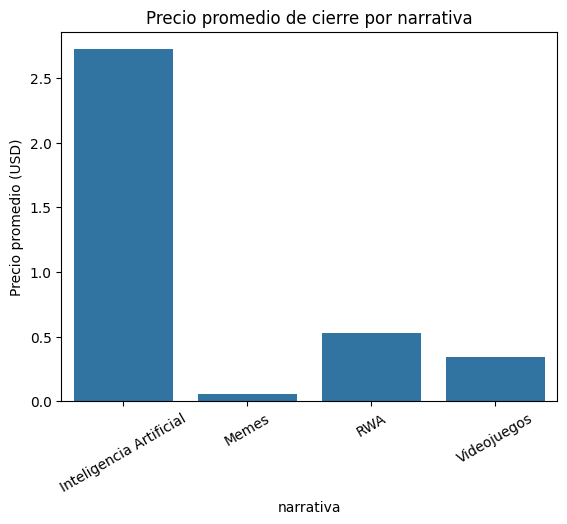

In [13]:
# 3. Precio promedio por narrativa
df_avg = df.groupby('narrativa')['close'].mean().reset_index()
sns.barplot(data=df_avg, x='narrativa', y='close')
plt.title("Precio promedio de cierre por narrativa")
plt.ylabel("Precio promedio (USD)")
plt.xticks(rotation=30)
plt.show()

2. An√°lisis de valores faltantes:

In [14]:
# Revisi√≥n de valores faltantes
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
symbol       0
narrativa    0
date         0
open         0
high         0
low          0
close        0
volume       0
target       0
dtype: int64


In [15]:
# Revisi√≥n de valores infinitos o no num√©ricos en columnas num√©ricas
print("\nValores no finitos detectados:")
print(df[["open", "high", "low", "close", "volume"]].isin([float('inf'), -float('inf')]).sum())


Valores no finitos detectados:
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [16]:
df.isna().mean()*100

symbol       0.0
narrativa    0.0
date         0.0
open         0.0
high         0.0
low          0.0
close        0.0
volume       0.0
target       0.0
dtype: float64

3. Creaci√≥n de columnas adicionales

In [17]:
# Crear retorno diario
df['return_pct'] = df.groupby('symbol')['close'].pct_change() * 100

# Crear rango de volatilidad diaria
df['volatility'] = df['high'] - df['low']

# Media m√≥vil de 7 d√≠as sobre el precio de cierre
df['ma_7'] = df.groupby('symbol')['close'].transform(lambda x: x.rolling(7).mean())

# Visualizar resultado de nuevas columnas
print("\nVista previa de las nuevas columnas:")
print(df[['symbol', 'date', 'close', 'return_pct', 'volatility', 'ma_7']].head(15))


Vista previa de las nuevas columnas:
   symbol        date    close  return_pct  volatility      ma_7
0    DOGE  2023-01-08  0.07358         NaN     0.00269       NaN
1    DOGE  2023-01-09  0.07562    2.772493     0.00660       NaN
2    DOGE  2023-01-10  0.07780    2.882835     0.00399       NaN
3    DOGE  2023-01-11  0.07813    0.424165     0.00381       NaN
4    DOGE  2023-01-12  0.08028    2.751824     0.00583       NaN
5    DOGE  2023-01-13  0.08452    5.281515     0.00656       NaN
6    DOGE  2023-01-14  0.08730    3.289162     0.00908  0.079604
7    DOGE  2023-01-15  0.08610   -1.374570     0.00511  0.081393
8    DOGE  2023-01-16  0.08366   -2.833914     0.00676  0.082541
9    DOGE  2023-01-17  0.08285   -0.968205     0.00300  0.083263
10   DOGE  2023-01-18  0.08004   -3.391672     0.01209  0.083536
11   DOGE  2023-01-19  0.08159    1.936532     0.00240  0.083723
12   DOGE  2023-01-20  0.08621    5.662459     0.00640  0.083964
13   DOGE  2023-01-21  0.08463   -1.832734     0.004

In [18]:
df = df.dropna(subset=['return_pct', 'ma_7'])

In [19]:
print(df.isna().sum())

symbol        0
narrativa     0
date          0
open          0
high          0
low           0
close         0
volume        0
target        0
return_pct    0
volatility    0
ma_7          0
dtype: int64


In [20]:
df.to_csv('cripto_limpio.csv', index=False)

4. Visualizaci√≥n de los datos

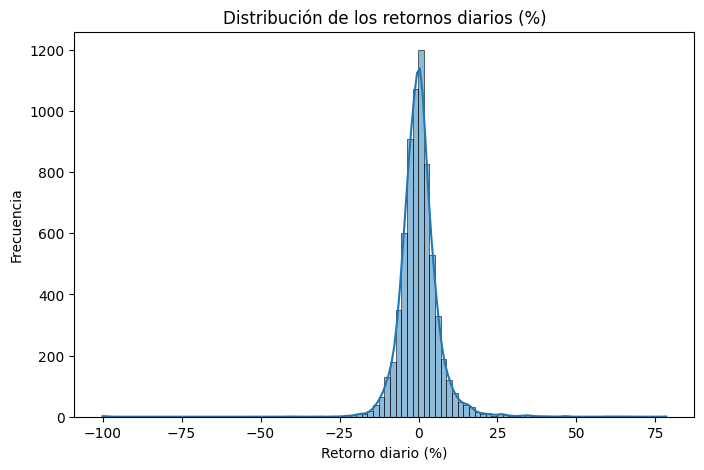

In [21]:
# Distribuci√≥n de los retornos:
plt.figure(figsize=(8,5))
sns.histplot(df['return_pct'], bins=100, kde=True)
plt.title("Distribuci√≥n de los retornos diarios (%)")
plt.xlabel("Retorno diario (%)")
plt.ylabel("Frecuencia")
plt.show()

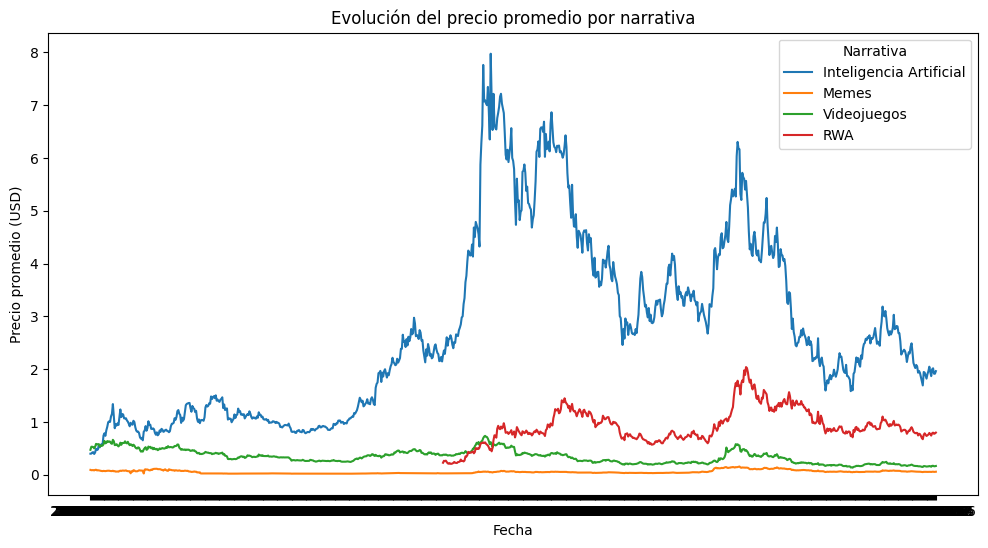

In [22]:
# Evoluci√≥n temporal del precio promedio por narrativa:
df_grouped = df.groupby(['date', 'narrativa'])['close'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=df_grouped, x='date', y='close', hue='narrativa')
plt.title("Evoluci√≥n del precio promedio por narrativa")
plt.xlabel("Fecha")
plt.ylabel("Precio promedio (USD)")
plt.legend(title='Narrativa')
plt.show()

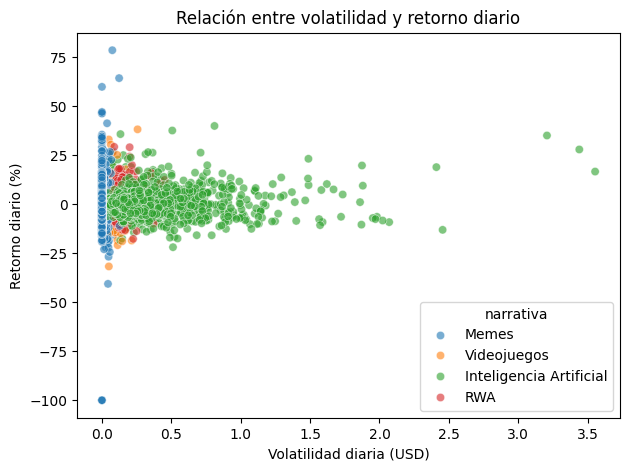

In [23]:
# Relaci√≥n entre volatilidad y retornos:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='volatility', y='return_pct', hue='narrativa', alpha=0.6)
plt.title("Relaci√≥n entre volatilidad y retorno diario")
plt.xlabel("Volatilidad diaria (USD)")
plt.ylabel("Retorno diario (%)")
plt.show()

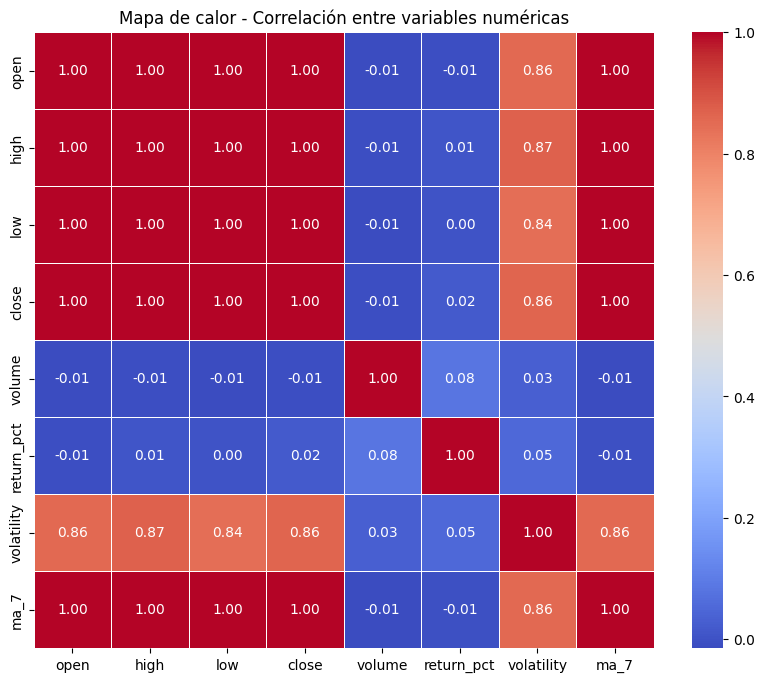

In [24]:
# Filtramos solo las variables num√©ricas relevantes
variables_numericas = ['open', 'high', 'low', 'close', 'volume', 'return_pct', 'volatility', 'ma_7']

# C√°lculo de la matriz de correlaci√≥n
correlaciones = df[variables_numericas].corr()

# Visualizaci√≥n del mapa de calor
plt.figure(figsize=(10,8))
sns.heatmap(correlaciones, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de calor - Correlaci√≥n entre variables num√©ricas")
plt.show()

Entrenamiento

In [25]:
import numpy as np
# 1. Cargar dataset limpio
df = pd.read_csv('cripto_limpio.csv')

# 2. Crear X e y
X = df.drop(columns=['symbol', 'date', 'target'])
y = df['target']

# 3. Codificar variable categ√≥rica (narrativa)
X = pd.get_dummies(X, columns=['narrativa'], drop_first=True)

# 4. Reemplazar infinitos con NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# 5. Eliminar filas con NaN
X.dropna(inplace=True)

# 6. Alinear y con los √≠ndices v√°lidos de X
y = y.loc[X.index]

In [26]:
from sklearn.model_selection import train_test_split

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Modelado

RANDOM FOREST

In [27]:
#librerias
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest")
print(confusion_matrix(y_test, rf_pred))
print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, rf_pred))

Random Forest
[[537 186]
 [213 436]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       723
           1       0.70      0.67      0.69       649

    accuracy                           0.71      1372
   macro avg       0.71      0.71      0.71      1372
weighted avg       0.71      0.71      0.71      1372



SVM

In [29]:
from sklearn.svm import SVC
# Escalar los datos (muy importante para SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar modelo SVM con kernel RBF
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predicciones
svm_pred = svm_model.predict(X_test_scaled)

# Evaluaci√≥n
print("Support Vector Machine (SVM)")
print("Matriz de confusi√≥n:")
print(confusion_matrix(y_test, svm_pred))
print("\nReporte de clasificaci√≥n:")
print(classification_report(y_test, svm_pred))


Support Vector Machine (SVM)
Matriz de confusi√≥n:
[[566 157]
 [418 231]]

Reporte de clasificaci√≥n:
              precision    recall  f1-score   support

           0       0.58      0.78      0.66       723
           1       0.60      0.36      0.45       649

    accuracy                           0.58      1372
   macro avg       0.59      0.57      0.55      1372
weighted avg       0.58      0.58      0.56      1372



In [30]:
print("üîç COMPARACI√ìN AVANZADA: RANDOM FOREST vs SVM")
print("="*60)

from sklearn.metrics import roc_auc_score, roc_curve
import joblib

print("üéØ Entrenando SVM con probabilidades...")
svm_prob_model = SVC(kernel='rbf', C=1.0, probability=True, random_state=42)
svm_prob_model.fit(X_train_scaled, y_train)
svm_prob_pred = svm_prob_model.predict(X_test_scaled)

print("SVM con Probabilidades:")
print(confusion_matrix(y_test, svm_prob_pred))
print(classification_report(y_test, svm_prob_pred))

# Comparaci√≥n de modelos
modelos_comparacion = {
    'Random Forest': {
        'pred': rf_pred,
        'prob': rf_model.predict_proba(X_test)[:, 1],
        'modelo': rf_model,
        'usa_scaler': False
    },
    'SVM': {
        'pred': svm_prob_pred,
        'prob': svm_prob_model.predict_proba(X_test_scaled)[:, 1],
        'modelo': svm_prob_model,
        'usa_scaler': True
    }
}

print("\nüìä COMPARACI√ìN DE M√âTRICAS:")
print("="*40)

# Calcular todas las m√©tricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for nombre, datos in modelos_comparacion.items():
    acc = accuracy_score(y_test, datos['pred'])
    prec = precision_score(y_test, datos['pred'])
    rec = recall_score(y_test, datos['pred'])
    f1 = f1_score(y_test, datos['pred'])
    auc = roc_auc_score(y_test, datos['prob'])

    print(f"\n{nombre}:")
    print(f"  Accuracy:  {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall:    {rec:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print(f"  AUC-ROC:   {auc:.4f}")

# Identificar mejor modelo
f1_scores = {nombre: f1_score(y_test, datos['pred']) for nombre, datos in modelos_comparacion.items()}
mejor_modelo_nombre = max(f1_scores, key=f1_scores.get)

print(f"\nüèÜ MEJOR MODELO: {mejor_modelo_nombre}")
print(f"üìà F1-Score: {f1_scores[mejor_modelo_nombre]:.4f}")

# Guardar mejor modelo
mejor_modelo_data = modelos_comparacion[mejor_modelo_nombre]
joblib.dump(mejor_modelo_data['modelo'], 'mejor_modelo_final.pkl')

if mejor_modelo_data['usa_scaler']:
    joblib.dump(scaler, 'scaler_final.pkl')
    print("‚úÖ Modelo y scaler guardados")
else:
    print("‚úÖ Modelo guardado")

üîç COMPARACI√ìN AVANZADA: RANDOM FOREST vs SVM
üéØ Entrenando SVM con probabilidades...
SVM con Probabilidades:
[[566 157]
 [418 231]]
              precision    recall  f1-score   support

           0       0.58      0.78      0.66       723
           1       0.60      0.36      0.45       649

    accuracy                           0.58      1372
   macro avg       0.59      0.57      0.55      1372
weighted avg       0.58      0.58      0.56      1372


üìä COMPARACI√ìN DE M√âTRICAS:

Random Forest:
  Accuracy:  0.7092
  Precision: 0.7010
  Recall:    0.6718
  F1-Score:  0.6861
  AUC-ROC:   0.7990

SVM:
  Accuracy:  0.5809
  Precision: 0.5954
  Recall:    0.3559
  F1-Score:  0.4455
  AUC-ROC:   0.6000

üèÜ MEJOR MODELO: Random Forest
üìà F1-Score: 0.6861
‚úÖ Modelo guardado



üìä GENERANDO VISUALIZACIONES...


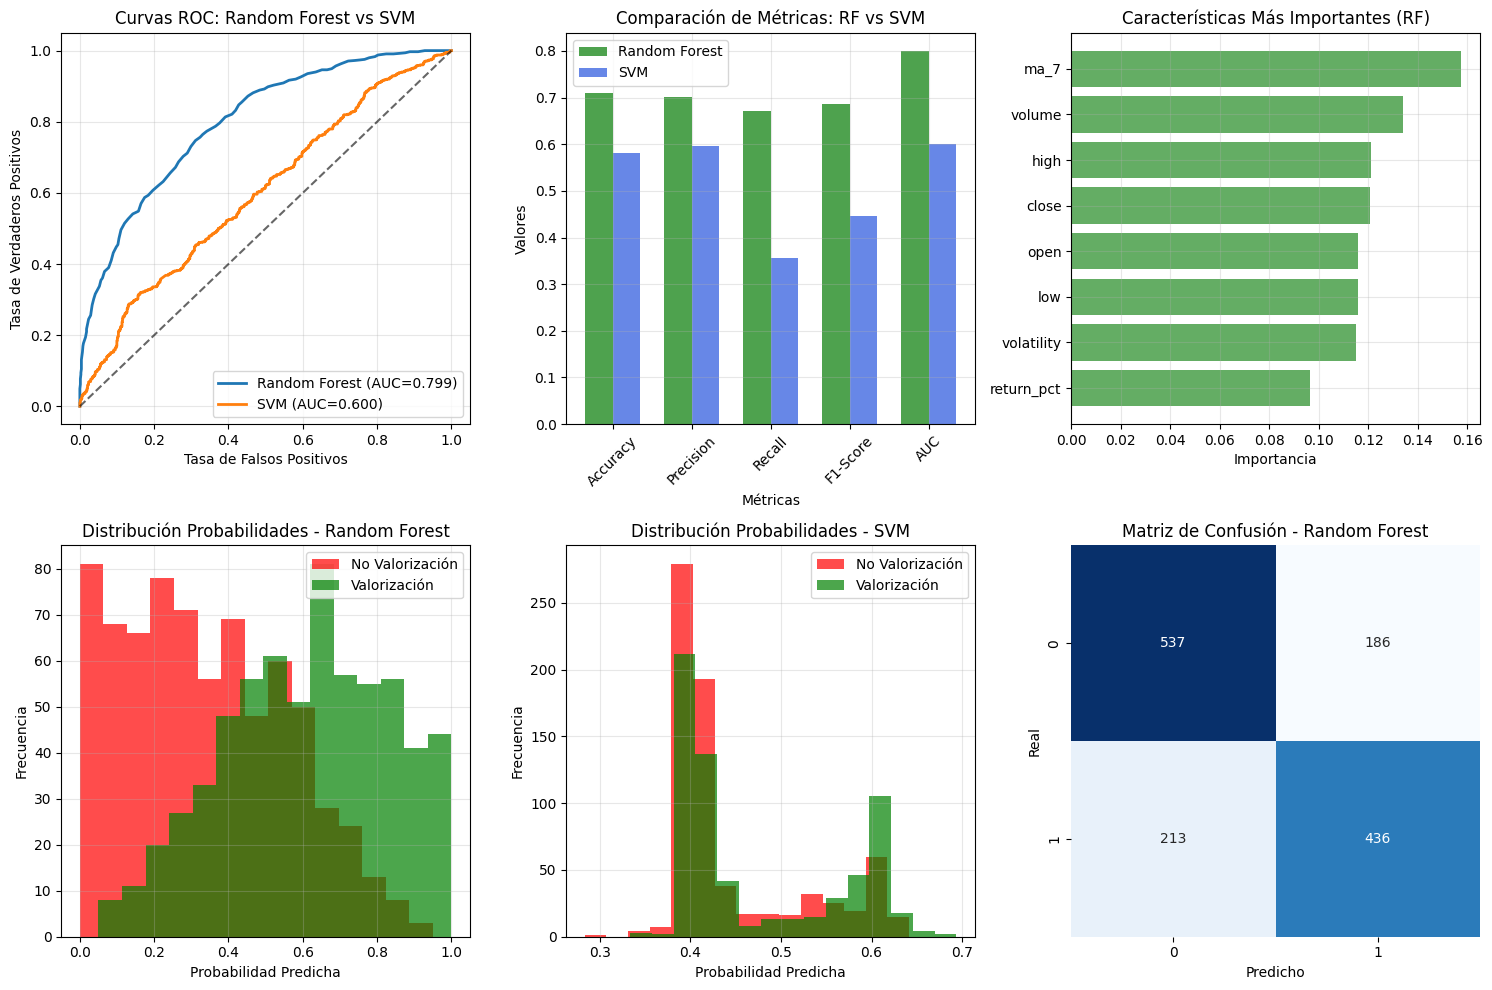

‚úÖ Visualizaciones completadas


In [31]:
print("\nüìä GENERANDO VISUALIZACIONES...")

plt.figure(figsize=(15, 10))

# Subplot 1: Curvas ROC
plt.subplot(2, 3, 1)
for nombre, datos in modelos_comparacion.items():
    fpr, tpr, _ = roc_curve(y_test, datos['prob'])
    auc = roc_auc_score(y_test, datos['prob'])
    plt.plot(fpr, tpr, label=f'{nombre} (AUC={auc:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC: Random Forest vs SVM')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Comparaci√≥n de m√©tricas
plt.subplot(2, 3, 2)
metricas = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
rf_valores = [
    accuracy_score(y_test, modelos_comparacion['Random Forest']['pred']),
    precision_score(y_test, modelos_comparacion['Random Forest']['pred']),
    recall_score(y_test, modelos_comparacion['Random Forest']['pred']),
    f1_score(y_test, modelos_comparacion['Random Forest']['pred']),
    roc_auc_score(y_test, modelos_comparacion['Random Forest']['prob'])
]
svm_valores = [
    accuracy_score(y_test, modelos_comparacion['SVM']['pred']),
    precision_score(y_test, modelos_comparacion['SVM']['pred']),
    recall_score(y_test, modelos_comparacion['SVM']['pred']),
    f1_score(y_test, modelos_comparacion['SVM']['pred']),
    roc_auc_score(y_test, modelos_comparacion['SVM']['prob'])
]

x = np.arange(len(metricas))
width = 0.35

plt.bar(x - width/2, rf_valores, width, label='Random Forest', alpha=0.8, color='forestgreen')
plt.bar(x + width/2, svm_valores, width, label='SVM', alpha=0.8, color='royalblue')

plt.xlabel('M√©tricas')
plt.ylabel('Valores')
plt.title('Comparaci√≥n de M√©tricas: RF vs SVM')
plt.xticks(x, metricas, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 3: Importancia de caracter√≠sticas (Random Forest)
plt.subplot(2, 3, 3)
feature_names = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-8:]  # Top 8

plt.barh(range(len(indices)), importances[indices], color='forestgreen', alpha=0.7)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importancia')
plt.title('Caracter√≠sticas M√°s Importantes (RF)')
plt.grid(True, alpha=0.3)

# Subplot 4: Distribuci√≥n de probabilidades - Random Forest
plt.subplot(2, 3, 4)
rf_prob = modelos_comparacion['Random Forest']['prob']
plt.hist(rf_prob[y_test==0], alpha=0.7, label='No Valorizaci√≥n', bins=15, color='red')
plt.hist(rf_prob[y_test==1], alpha=0.7, label='Valorizaci√≥n', bins=15, color='green')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n Probabilidades - Random Forest')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 5: Distribuci√≥n de probabilidades - SVM
plt.subplot(2, 3, 5)
svm_prob = modelos_comparacion['SVM']['prob']
plt.hist(svm_prob[y_test==0], alpha=0.7, label='No Valorizaci√≥n', bins=15, color='red')
plt.hist(svm_prob[y_test==1], alpha=0.7, label='Valorizaci√≥n', bins=15, color='green')
plt.xlabel('Probabilidad Predicha')
plt.ylabel('Frecuencia')
plt.title('Distribuci√≥n Probabilidades - SVM')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 6: Matrices de confusi√≥n
plt.subplot(2, 3, 6)
# Matriz del mejor modelo
cm = confusion_matrix(y_test, modelos_comparacion[mejor_modelo_nombre]['pred'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusi√≥n - {mejor_modelo_nombre}')
plt.ylabel('Real')
plt.xlabel('Predicho')

plt.tight_layout()
plt.show()

print("‚úÖ Visualizaciones completadas")

In [32]:
print("\nüîç CONFIGURANDO SISTEMA DE PREDICCI√ìN...")

import requests

# Usar TU API key
API_KEY = 'f06c12bd4e08d97fecda3a74fbc4ee5f6fc556e5b3d853059ee2037077b2b5c6'
headers = {'authorization': f'Apikey {API_KEY}'}

def obtener_datos_cripto(symbol, days=30):
    """Funci√≥n para obtener datos de la API"""
    url = 'https://min-api.cryptocompare.com/data/v2/histoday'
    params = {'fsym': symbol, 'tsym': 'USD', 'limit': days, 'aggregate': 1}

    try:
        response = requests.get(url, headers=headers, params=params)
        data = response.json()

        if data['Response'] != 'Success':
            return None

        rows = []
        for d in data['Data']['Data']:
            rows.append({
                'date': pd.to_datetime(d['time'], unit='s'),
                'open': d['open'], 'high': d['high'], 'low': d['low'],
                'close': d['close'], 'volume': d['volumeto']
            })

        return pd.DataFrame(rows)
    except Exception as e:
        print(f"Error obteniendo {symbol}: {e}")
        return None

def procesar_datos_prediccion(df_new, narrativa):
    """Usar EXACTAMENTE tu preprocesamiento"""
    if df_new is None or len(df_new) < 7:
        return None

    # Tu c√≥digo exacto
    df_new['return_pct'] = df_new['close'].pct_change() * 100
    df_new['volatility'] = df_new['high'] - df_new['low']
    df_new['ma_7'] = df_new['close'].rolling(7).mean()
    df_new = df_new.dropna()

    if len(df_new) == 0:
        return None

    # √öltima observaci√≥n
    ultima_fila = df_new.iloc[-1:].copy()
    ultima_fila['narrativa'] = narrativa

    # Preparar caracter√≠sticas
    features = ultima_fila[['open', 'high', 'low', 'close', 'volume', 'return_pct', 'volatility', 'ma_7', 'narrativa']]
    features_encoded = pd.get_dummies(features, columns=['narrativa'], drop_first=True)

    # Asegurar mismas columnas que entrenamiento
    columnas_modelo = ['open', 'high', 'low', 'close', 'volume', 'return_pct', 'volatility', 'ma_7',
                       'narrativa_Memes', 'narrativa_RWA', 'narrativa_Videojuegos']

    for col in columnas_modelo:
        if col not in features_encoded.columns:
            features_encoded[col] = 0

    return features_encoded[columnas_modelo], df_new['close'].iloc[-1]

def predecir_token(symbol, narrativa):
    """Predicci√≥n usando el mejor modelo"""
    print(f"üîç Analizando {symbol} ({narrativa})")

    # Obtener y procesar datos
    df_new = obtener_datos_cripto(symbol)
    resultado = procesar_datos_prediccion(df_new, narrativa)

    if resultado is None:
        print(f"  ‚ùå No se pudieron procesar datos")
        return None

    features, precio = resultado

    # Usar el mejor modelo identificado
    try:
        if mejor_modelo_nombre == 'Random Forest':
            pred = rf_model.predict(features)[0]
            prob = rf_model.predict_proba(features)[0][1]
        else:  # SVM
            features_scaled = scaler.transform(features)
            pred = svm_prob_model.predict(features_scaled)[0]
            prob = svm_prob_model.predict_proba(features_scaled)[0][1]

        return {
            'symbol': symbol,
            'narrativa': narrativa,
            'prediccion': pred,
            'probabilidad': prob,
            'precio_actual': precio
        }
    except Exception as e:
        print(f"  ‚ùå Error en predicci√≥n: {e}")
        return None

print(f"‚úÖ Sistema configurado con modelo: {mejor_modelo_nombre}")


üîç CONFIGURANDO SISTEMA DE PREDICCI√ìN...
‚úÖ Sistema configurado con modelo: Random Forest



üìä AN√ÅLISIS DE CRIPTOMONEDAS PARA PER√ö C-INVERSIONES
üîç Analizando 8 tokens con Random Forest...
üîç Analizando AI (Inteligencia Artificial)
üîç Analizando GALA (Videojuegos)
üîç Analizando OCEAN (Inteligencia Artificial)
üîç Analizando BONK (Memes)
üîç Analizando FLOKI (Memes)
üîç Analizando SAND (Videojuegos)
üîç Analizando TRU (RWA)
üîç Analizando AGIX (Inteligencia Artificial)

‚úÖ An√°lisis completado: 8/8 tokens

üîç RESULTADOS DETALLADOS:
‚Ä¢ AI (Inteligencia Artificial)
  Probabilidad: 68.00%
  Precio: $0.1109
  Estado: üü° MEDIA CONFIANZA
  Predicci√≥n: ‚úÖ Valorizaci√≥n

‚Ä¢ GALA (Videojuegos)
  Probabilidad: 40.00%
  Precio: $0.0143
  Estado: üî¥ BAJA CONFIANZA
  Predicci√≥n: ‚ùå Sin valorizaci√≥n

‚Ä¢ OCEAN (Inteligencia Artificial)
  Probabilidad: 39.00%
  Precio: $0.2997
  Estado: üî¥ BAJA CONFIANZA
  Predicci√≥n: ‚ùå Sin valorizaci√≥n

‚Ä¢ BONK (Memes)
  Probabilidad: 33.00%
  Precio: $0.0000
  Estado: üî¥ BAJA CONFIANZA
  Predicci√≥n: ‚ùå Sin valoriz

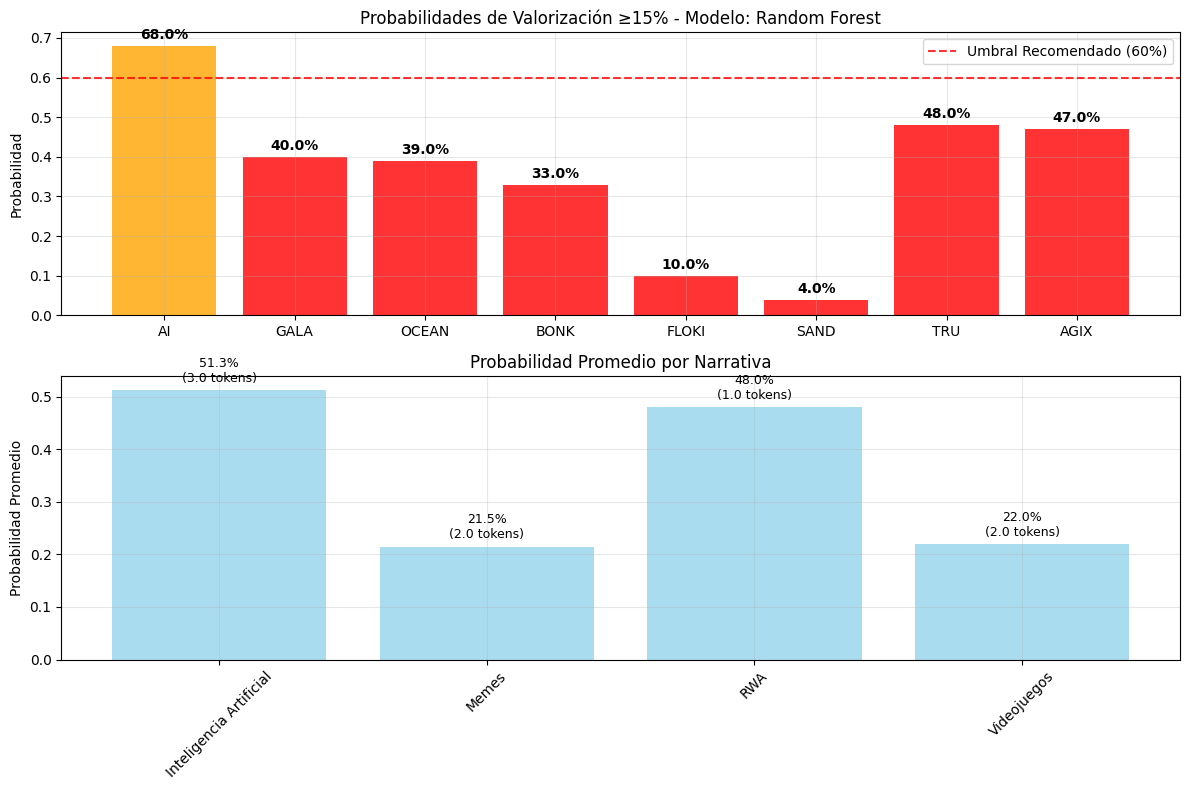


üìä TABLA RESUMEN FINAL:
symbol               narrativa  probabilidad  precio_actual
    AI Inteligencia Artificial          0.68         0.1109
  GALA             Videojuegos          0.40         0.0143
 OCEAN Inteligencia Artificial          0.39         0.2997
  BONK                   Memes          0.33         0.0000
 FLOKI                   Memes          0.10         0.0001
  SAND             Videojuegos          0.04         0.2467
   TRU                     RWA          0.48         0.0242
  AGIX Inteligencia Artificial          0.47         0.4963

üìà ESTAD√çSTICAS FINALES:
  ‚Ä¢ Probabilidad promedio: 36.1%
  ‚Ä¢ Tokens prometedores (‚â•60%): 1/8
  ‚Ä¢ Modelo utilizado: Random Forest
  ‚Ä¢ F1-Score del modelo: 0.6861

üéâ AN√ÅLISIS COMPLETO FINALIZADO
üèÜ Proyecto listo para presentar a Per√∫ C-Inversiones


In [33]:
print("\nüìä AN√ÅLISIS DE CRIPTOMONEDAS PARA PER√ö C-INVERSIONES")
print("="*65)

# Tokens a analizar
tokens_analizar = {
    'AI': 'Inteligencia Artificial',
    'GALA': 'Videojuegos',
    'OCEAN': 'Inteligencia Artificial',
    'BONK': 'Memes',
    'FLOKI': 'Memes',
    'SAND': 'Videojuegos',
    'TRU': 'RWA',
    'AGIX': 'Inteligencia Artificial'
}

print(f"üîç Analizando {len(tokens_analizar)} tokens con {mejor_modelo_nombre}...")

# Realizar predicciones
resultados = []
for symbol, narrativa in tokens_analizar.items():
    resultado = predecir_token(symbol, narrativa)
    if resultado:
        resultados.append(resultado)

if resultados:
    df_resultados = pd.DataFrame(resultados)

    print(f"\n‚úÖ An√°lisis completado: {len(df_resultados)}/{len(tokens_analizar)} tokens")

    # Mostrar resultados detallados
    print(f"\nüîç RESULTADOS DETALLADOS:")
    for _, row in df_resultados.iterrows():
        if row['probabilidad'] > 0.7:
            estado = "üü¢ ALTA CONFIANZA"
        elif row['probabilidad'] > 0.5:
            estado = "üü° MEDIA CONFIANZA"
        else:
            estado = "üî¥ BAJA CONFIANZA"

        pred_texto = "‚úÖ Valorizaci√≥n" if row['prediccion'] == 1 else "‚ùå Sin valorizaci√≥n"

        print(f"‚Ä¢ {row['symbol']} ({row['narrativa']})")
        print(f"  Probabilidad: {row['probabilidad']:.2%}")
        print(f"  Precio: ${row['precio_actual']:.4f}")
        print(f"  Estado: {estado}")
        print(f"  Predicci√≥n: {pred_texto}")
        print()

    # Generar recomendaciones
    tokens_recomendados = df_resultados[df_resultados['probabilidad'] >= 0.6].sort_values('probabilidad', ascending=False)

    print("üöÄ RECOMENDACIONES PARA PER√ö C-INVERSIONES:")
    print("="*50)

    if len(tokens_recomendados) > 0:
        print("üìà TOKENS RECOMENDADOS (‚â•60% probabilidad):")
        for i, (_, row) in enumerate(tokens_recomendados.iterrows(), 1):
            print(f"  {i}. {row['symbol']} - {row['probabilidad']:.1%} (${row['precio_actual']:.4f})")

        print(f"\nüí° ESTRATEGIA SUGERIDA:")
        print(f"  ‚Ä¢ Diversificar entre {len(tokens_recomendados)} tokens recomendados")
        print(f"  ‚Ä¢ Asignar m√°ximo 5% del portafolio por token")
        print(f"  ‚Ä¢ Stop-loss: -15% | Take-profit: +15%")
        print(f"  ‚Ä¢ Revisar predicciones semanalmente")
    else:
        print("‚ùå Ning√∫n token cumple criterio m√≠nimo (60%)")
        print("üí° Sugerencia: Esperar mejores oportunidades")

    # Guardar resultados
    df_resultados.to_csv('analisis_final_peru_c_inversiones.csv', index=False)
    print(f"\nüíæ Resultados guardados en CSV")

    # Visualizaci√≥n final
    plt.figure(figsize=(12, 8))

    # Gr√°fico principal
    plt.subplot(2, 1, 1)
    colors = ['darkgreen' if p >= 0.7 else 'orange' if p >= 0.5 else 'red' for p in df_resultados['probabilidad']]
    bars = plt.bar(df_resultados['symbol'], df_resultados['probabilidad'], color=colors, alpha=0.8)

    plt.title(f'Probabilidades de Valorizaci√≥n ‚â•15% - Modelo: {mejor_modelo_nombre}')
    plt.ylabel('Probabilidad')
    plt.axhline(y=0.6, color='red', linestyle='--', alpha=0.8, label='Umbral Recomendado (60%)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # A√±adir valores en barras
    for bar, prob in zip(bars, df_resultados['probabilidad']):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{prob:.1%}', ha='center', va='bottom', fontweight='bold')

    # Gr√°fico por narrativa
    plt.subplot(2, 1, 2)
    narrativa_stats = df_resultados.groupby('narrativa').agg({
        'probabilidad': 'mean',
        'symbol': 'count'
    }).round(3)

    plt.bar(narrativa_stats.index, narrativa_stats['probabilidad'], alpha=0.7, color='skyblue')
    plt.title('Probabilidad Promedio por Narrativa')
    plt.ylabel('Probabilidad Promedio')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # A√±adir valores
    for i, (narrativa, data) in enumerate(narrativa_stats.iterrows()):
        plt.text(i, data['probabilidad'] + 0.01, f"{data['probabilidad']:.1%}\n({data['symbol']} tokens)",
                ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Tabla resumen final
    print(f"\nüìä TABLA RESUMEN FINAL:")
    print(df_resultados[['symbol', 'narrativa', 'probabilidad', 'precio_actual']].round(4).to_string(index=False))

    # Estad√≠sticas finales
    prob_promedio = df_resultados['probabilidad'].mean()
    tokens_prometedores = len(df_resultados[df_resultados['probabilidad'] >= 0.6])

    print(f"\nüìà ESTAD√çSTICAS FINALES:")
    print(f"  ‚Ä¢ Probabilidad promedio: {prob_promedio:.1%}")
    print(f"  ‚Ä¢ Tokens prometedores (‚â•60%): {tokens_prometedores}/{len(df_resultados)}")
    print(f"  ‚Ä¢ Modelo utilizado: {mejor_modelo_nombre}")
    print(f"  ‚Ä¢ F1-Score del modelo: {f1_scores[mejor_modelo_nombre]:.4f}")

else:
    print("‚ùå No se obtuvieron resultados")

print(f"\nüéâ AN√ÅLISIS COMPLETO FINALIZADO")